# Experiment 1
Variable Batch Time Out

| Experiment     | Batch TimeOut (seconds) | Prefered Batch Size(MB) | Endorsement Policy | Transaction Rate |
|----------------|-------------------------|-------------------------|--------------------|------------------|
| Experiment 1.1 | 2                       | 10 MB                    | All AND            | 5               |
| Experiment 1.2 | 5                       | 10 MB                    | All AND            | 5               |
| Experiment 1.3 | 10                      | 10 MB                    | All AND            | 5               |
| Experiment 1.4 | 15                      | 10 MB                    | All AND            | 5               |

This for Varied transaction rates. Batch Time out 2s.
Experiment 1.1 One Trasaction per 5 second 

In [2]:
from time import sleep
def create_peer_invoke_command():
    base = "docker exec -it cli peer chaincode invoke -o orderer.organ.com:7050 --tls true --cafile /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/ordererOrganizations/organ.com/orderers/orderer.organ.com/msp/tlscacerts/tlsca.organ.com-cert.pem -C organ-channel -n organcc "
    return(base)

def add_peers(org='hl', peer_n=0):
    hl_p1_add = ' --peerAddresses peer1.histocompatibility.organ.com:7051 '
    hl_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer1.histocompatibility.organ.com/tls/ca.crt '
    hl_p0_add = ' --peerAddresses peer0.histocompatibility.organ.com:7051 '
    hl_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer0.histocompatibility.organ.com/tls/ca.crt '
    
    ho_p1_add = ' --peerAddresses peer1.hospital.organ.com:7051 '
    ho_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer1.hospital.organ.com/tls/ca.crt  '
    ho_p0_add = ' --peerAddresses peer0.hospital.organ.com:7051 '
    ho_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer0.hospital.organ.com/tls/ca.crt  '
    
    gp_p1_add = ' --peerAddresses peer1.gp.organ.com:7051 '
    gp_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer1.gp.organ.com/tls/ca.crt  '
    gp_p0_add = ' --peerAddresses peer0.gp.organ.com:7051 '
    gp_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer0.gp.organ.com/tls/ca.crt  '
    
    op_p1_add = ' --peerAddresses peer1.opo.organ.com:7051 '
    op_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer1.opo.organ.com/tls/ca.crt  '
    op_p0_add = ' --peerAddresses peer0.opo.organ.com:7051 '
    op_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer0.opo.organ.com/tls/ca.crt  '
    cmd = ""
    cmd += create_peer_invoke_command() + hl_p1_add + hl_p1_cert
    cmd += hl_p0_add + hl_p0_cert
    cmd += ho_p0_add + ho_p0_cert + ho_p1_add + ho_p1_cert
    cmd += gp_p0_add + gp_p0_cert + gp_p1_add + gp_p1_cert
    cmd += op_p0_add + op_p0_cert + op_p1_add + op_p1_cert
    return(cmd)

def add_organ(organ_id = '', organ_name='', organ_data=''):
    cmd = add_peers() + '-c '
    
    cmd += '\'{"Args":["initOrgan", "' + str(organ_id) + '", "' + str(organ_name) + '", ' + str(organ_data) + ']}\''
    return(cmd)

def read_organ(organ_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readOrgan",\"' + str(organ_id) + '\"]}\''
    return(cmd)

def add_candidate(candidate_id = '', organ_name='', info=''):
    cmd = add_peers() + '-c '
    cmd += '\'{"Args":["initCandidate", "' + candidate_id + '", "' + organ_name + '", ' + info + ']}\''
    return(cmd)

def read_candidate(candidate_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readCandidate",\"' + str(candidate_id) + '\"]}\''
    return(cmd)

def docker_cleanup():
    !{ "docker rm -f $(docker ps -aq)"}
    !{ "docker volume prune -f"}
    !{ "docker network prune -f"}
    docker_images = "docker images --format '{{.Repository}}'"
    images = !{docker_images}
    dev_images=[]
    for image in images:
        if(image.find('dev-', 0, 6)>=0):
            dev_images.append(image)
    docker_rmi = "docker rmi -f "+" ".join(dev_images)
    print(docker_rmi)
    !{docker_rmi}

In [3]:
# docker_cleanup()


In [4]:
DATA_DIR = "/home/utsav_jain/RenewThesis/data"
with open(r"%s/data_1.json"%DATA_DIR, 'r') as file:
    data_1 = file.read()
with open(r"%s/data_2.json"%DATA_DIR, 'r') as file:
    data_2 = file.read()
with open(r"%s/data_3.json"%DATA_DIR, 'r') as file:
    data_3 = file.read()
with open(r"%s/data_4.json"%DATA_DIR, 'r') as file:
    data_4 = file.read()
import json
data = []
data.append(json.dumps(data_1))
data.append(json.dumps(data_2))
data.append(json.dumps(data_3))
data.append(json.dumps(data_4))

Issueing Transactions every 5 seconds

In [9]:
for i in range(50):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)

2019-05-27 23:20:25.597 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:20:31.215 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:20:36.836 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:20:42.482 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:20:48.073 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:20:53.675 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-05-27 23:24:39.359 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:24:45.399 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:24:51.538 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:24:57.752 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:25:04.027 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 23:25:10.135 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-05-27 23:27:10.058 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:27:16.374 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:27:22.846 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:27:29.334 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:27:35.838 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > 

2019-05-27 23:27:48.197 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \356\016\313\225.^\035&\"d\367W\205\336\254h\227'\364]gD\003\207\031\240\231\2444\256\212\206\022\343\213\002\n\277\213\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\242\213\002\n\007organcc\022\225\213\002\n\006\n\0044025\n\n\n\0048021\022\002\010\033\022O\n\001\001\030\001*H\0102\020\001\032 \300qz\336\373+G\271{\335\325\304\236\265\320\345\262I:\355M\321t\351\211!{[\315\232E\213\032 \243/9'\001\362k\004\273\253\377M\010\331\275\374$@\253\031w\310\3208\033\330\200u\\\005g\370\032\212\205\001\n\0044025\032\200\205\001{\"docType\":\"organ\",\"organID\":\"4025\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 5071

2019-05-27 23:28:00.380 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:28:07.026 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:28:13.601 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:28:20.174 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:28:26.819 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:28:33.462 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Erro

2019-05-27 23:28:45.924 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:28:52.340 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \326\207\007`O\014#n,.\277\250\331\005\252\254`!B\322\313\001\035\323\035%\"n\224K\022l\022\337\213\002\n\273\213\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\236\213\002\n\007organcc\022\221\213\002\n\006\n\0044035\n\n\n\0048029\022\002\010#\n\n\n\0048031\022\002\010%\022O\n\001\001\030\001*H\0102\020\001\032 \253\300\274\202\205\362t\234\216\315\260\340=\365\336i!\036\226\221F\272=8y\030[\006\270\347;\257\032 \273\016J\365\214-\257\253\210Y\247-\034\377\275d

2019-05-27 23:29:04.913 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \212\n\342\251#\375j\337|\014\263\255\351}\030\212\254\361<\030\254?\001\236\210G7\272\233\333E=\022\343\213\002\n\277\213\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\242\213\002\n\007organcc\022\225\213\002\n\006\n\0044037\n\n\n\0048029\022\002\010#\022O\n\001\001\030\001*H\0102\020\001\032 \177\216\367E\347\206\231\324M\372\345\023%\336\217%\017\3438M\033\320X)\273\226\361^'S\233}\032 \362N\270\206\267\226\202\221\333u\307\307-O\241\301~\257c-\245`\023\265\221#{\300\032W\331U\032\212\205\001\n\0044037\032\200\205\001{\"docType\":\"organ\",\"organID\":\"4037\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50

2019-05-27 23:29:17.501 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \315\226\0214B\000<\306\013\020/\376\340\230\033\001\n\222$\010QVI\213\227\013\320\3233\253\204\321\022\337\213\002\n\273\213\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\236\213\002\n\007organcc\022\221\213\002\n\006\n\0044039\n\n\n\0048029\022\002\010#\n\n\n\0048031\022\002\010%\022O\n\001\001\030\001*H\0102\020\001\032 \261\035\366}\244]\233L\373\231\204\021\327>\004\224\006\256\034\340u\273\266\321\2144\222o\2004\205\216\032 \034\357@\305\244\020\343\375\224\316[\223,g\335\002q\n\024\235\343\341\371\317\350\210\n\313\315,\037\277\032\202\205\001\n\0044039\032\370\204\001{\"docType\":\"organ\",\"organID\":\"4039\",\"typ

2019-05-27 23:29:30.034 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:29:36.356 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \315\373\322\3543G}\370;,\026\010\352h\016\210t\320\241\014\262\340\373\320\364>\313\010\t\370\037\222\022\265\214\002\n\221\214\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\364\213\002\n\007organcc\022\347\213\002\n\006\n\0044042\n\n\n\0048029\022\002\010#\n\n\n\0048031\022\002\010%\n\n\n\0048033\022\002\010'\n\n\n\0048035\022\002\010)\n\n\n\0048037\022\002\010+\n\n\n\0048039\022\002\010-\n\n\n\0048040\022\002\010.\n\n\n\0048041\022\002\010/\n\n\n\0048042\022

2019-05-27 23:29:48.950 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 23:29:55.320 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \221@\263\336\266\370\033>\213=\230\211\240)\023\256m\331\352`\266\250j\204\241\362\272\330\327v0k\022\343\213\002\n\277\213\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\242\213\002\n\007organcc\022\225\213\002\n\006\n\0044045\n\n\n\0048033\022\002\010'\022O\n\001\001\030\001*H\0102\020\001\032 v\3139Q\2779\315:\355\311-,\373Nw\322\263ec\301b?F\303\257R\332\201\365K%\360\032 q\013#\025ebm\354\344\226\357\214\021\204\004\356\356\353\2474e\020#\257\330]\276$\247

2019-05-27 23:30:07.951 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n R\305\303\014LD\204\003\177\205f\025b\0302\260\315\313\024\263\227w\225}87x\254\213\331\274v\022\337\213\002\n\273\213\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\236\213\002\n\007organcc\022\221\213\002\n\006\n\0044047\n\n\n\0048033\022\002\010'\n\n\n\0048035\022\002\010)\022O\n\001\001\030\001*H\0102\020\001\032 W\tP*x\034\374\227`ES\254\020\230\302\363<\264\342\034\234c\320\033+\2206\326\376+\024~\032 x4l\n\376\021\241n\316\204\277\025{\265\027\243\313\244%KXf.T\276f\\\271\331\227\253#\032\202\205\001\n\0044047\032\370\204\001{\"docType\":\"organ\",\"organID\":\"4047\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki

2019-05-27 23:30:20.290 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
Error: could not assemble transaction: ProposalResponsePayloads do not match - proposal response: version:1 response:<status:200 payload:"\016\211\336\"x\255:\270\032" > payload:"\n \253\351\033S/\211X\2730\323\312Y\347m\230\200B\253\235@\361j!)\267l\250\335.\377d\227\022\343\213\002\n\277\213\002\022\027\n\004lscc\022\017\n\r\n\007organcc\022\002\010\005\022\242\213\002\n\007organcc\022\225\213\002\n\006\n\0044049\n\n\n\0048033\022\002\010'\022O\n\001\001\030\001*H\0102\020\001\032 W\tP*x\034\374\227`ES\254\020\230\302\363<\264\342\034\234c\320\033+\2206\326\376+\024~\032 x4l\n\376\021\241n\316\204\277\025{\265\027\243\313\244%KXf.T\276f\\\271\331\227\253#\032\212\205\001\n\0044049\032\200\205\001{\"docType\":\"organ\",\"organID\":\"4049\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard

2019-05-27 23:30:32.284 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8000\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:30:37.786 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:30:43.286 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:30:48.798 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:30:54.340 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:30:59.891 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:31:05.474 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:31:11.035 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:31:16.554 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:31:22.068 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:31:27.600 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:31:33.149 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:31:38.722 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:31:44.270 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:31:49.799 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:31:55.333 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8015\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:32:00.846 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8016\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:32:06.384 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8017\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:32:11.931 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8018\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:32:17.432 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8019\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:32:22.957 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8020\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:32:28.477 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8021\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:32:33.982 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8022\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:32:39.508 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8023\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:32:45.027 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8024\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:32:50.547 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8025\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:32:56.063 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8026\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:33:01.574 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8027\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:33:07.101 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8028\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:33:12.638 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8029\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:33:18.208 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8030\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:33:23.723 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8031\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:33:29.273 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8032\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:33:34.820 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8033\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:33:40.371 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8034\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:33:45.904 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8035\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:33:51.427 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8036\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:33:56.955 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8037\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:34:02.494 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8038\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:34:08.025 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8039\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:34:13.547 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8040\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:34:19.070 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8041\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:34:24.576 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8042\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:34:30.082 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8043\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:34:35.592 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8044\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:34:41.089 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8045\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:34:46.607 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8046\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 23:34:52.129 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8047\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 23:34:57.645 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8048\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 23:35:03.179 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8049\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 23:35:08.690 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:35:14.231 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:35:19.774 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 23:35:25.294 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 23:35:30.817 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:35:36.336 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:35:41.873 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 23:35:47.407 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

lbynchcxwyxsamevdhoatcwfyfx\\\", \\\"lub_back_tbl_flush_ostxt\\\": \\\"nsmobzdibqlcmzvswhtgguihpriycdsalxnqvwbmslmqcgfbvw\\\", \\\"hr_discard_cd_ostxt\\\": \\\"shbptcogtrwvabxztooxexxjnxskofgxtjzlcjdqjaaoxzjyza\\\", \\\"kir_pump\\\": \\\"l\\\", \\\"rt_ki_biopsy_ty_ostxt\\\": \\\"bttpyjvuzsflbmrgovqwnjlxmmaoszmdzhzemmtoxjznknxezp\\\", \\\"pas1_initial_flush\\\": 69488022, \\\"clin_infect_don\\\": \\\"l\\\", \\\"sgot_don\\\": 32624311, \\\"hr_back_tbl_flush\\\": 4770290, \\\"cmv_don\\\": \\\"op\\\", \\\"pas2_discard_cd_ostxt\\\": \\\"xampeiufckiomtgmadeyfbgtkykargaghwlzmftdfhlmcjjjij\\\", \\\"kib_initial_flush\\\": 63174287, \\\"lur_reason_cd\\\": 55740274, \\\"db2\\\": 76428380, \\\"kir_reason_ostxt\\\": \\\"jsjazbthcrqgexojdjrbeutlsuuryndhzghulvqdnmlgardnmx\\\", \\\"num_hr_tx\\\": 31226451, \\\"kil_initial_flush_ostxt\\\": \\\"jwecvmpabghgraygcimcinllqquggzfumphcxemsojsoywmvjh\\\", \\\"contin_oth_drug_don\\\": \\\"m\\\", \\\"lt_one_week_don\\\": \\\"i\\\", \\\"cdc_risk_hiv_don\\\": \\\

2019-05-27 23:35:58.458 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:36:03.975 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 23:36:09.529 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 23:36:15.103 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:36:20.642 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

vmokpyidjuykpycyjpbgvxxtgekbekiy\\\", \\\"lur_reason_ostxt\\\": \\\"uvhdtgzntnossxfmlyzgwiacijqyxopxemwehnvvthkgfsmzsj\\\", \\\"num_in_tx\\\": 9548605, \\\"kil_discard_cd_ostxt\\\": \\\"lihqxucarsrmjzrhfoelzrdlgjuinxmknvgqwpkpykrqauknjn\\\", \\\"lt_ki_interstitial_fibrosis\\\": 70667369, \\\"pcwp_post_don\\\": 31131665, \\\"history_mi_don\\\": \\\"n\\\", \\\"diet_don\\\": \\\"c\\\", \\\"ebv_igg_cad_don\\\": \\\"zt\\\", \\\"htlv1_old_don\\\": \\\"wu\\\", \\\"kib_discard_cd\\\": 95267022, \\\"home_state_don\\\": \\\"zw\\\", \\\"vasodil_don\\\": \\\"q\\\", \\\"lul_back_tbl_flush\\\": 37702867, \\\"rt_lung_machine_perfusion\\\": \\\"m\\\", \\\"in_final_flush_ostxt\\\": \\\"sgzjlanbrwsuompyeajeblubhykybtkijtiqvifxcrqxaahpio\\\", \\\"kdri_med\\\": 28803721, \\\"pa_reason_ostxt\\\": \\\"jntkrzbbmnpunqpvxoozwkksoxdqvodpabbxbtxecasfxkevpg\\\", \\\"sgpt_don\\\": 8805080, \\\"num_lu_disc\\\": 42461808, \\\"rt_ki_biopsy_ty\\\": 32711044, \\\"referral_date\\\": 23264861, \\\"pas2_back_tbl_flush_ost

2019-05-27 23:36:26.209 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 23:36:31.735 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4015\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 23:36:37.278 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4016\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4017\"}" 
2019-05-27 23:36:48.417 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4018\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaeke

2019-05-27 23:36:53.947 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4019\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 23:36:59.471 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4020\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:37:05.001 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4021\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:37:10.522 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4022\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4023\"}" 
2019-05-27 23:37:21.577 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4024\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeo

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4025\"}" 
2019-05-27 23:37:32.604 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4026\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaeke

2019-05-27 23:37:38.115 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4027\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 23:37:43.654 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4028\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:37:49.170 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4029\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 23:37:54.735 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4030\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 23:38:00.265 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4031\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4032\"}" 
2019-05-27 23:38:11.308 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4033\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjng

2019-05-27 23:38:16.831 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4034\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4035\"}" 
2019-05-27 23:38:27.876 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4036\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeo

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4037\"}" 
2019-05-27 23:38:38.907 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4038\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaeke

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4039\"}" 
2019-05-27 23:38:49.964 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4040\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeo

2019-05-27 23:38:55.485 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4041\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4042\"}" 
2019-05-27 23:39:06.532 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4043\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdz

2019-05-27 23:39:12.052 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4044\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4045\"}" 
2019-05-27 23:39:23.080 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4046\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaeke

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4047\"}" 
2019-05-27 23:39:34.096 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4048\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeo

Error: endorsement failure during invoke. response: status:500 message:"transaction returned with failure: Error: {\"Error\":\"Organ does not exist: 4049\"}" 


Getting the Container Logs and saving them in folder

In [5]:
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s %s/logs_2s/%s.log" % (log_files[container], DATA_DIR ,container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 %s/logs_2s/%s.log" % (DATA_DIR, container))
    !{chomd}
#     pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2s/%s.log'%(DATA_DIR, container))

# docker_cleanup()
# print(log_files)

In [49]:
docker_cleanup()
print(log_files)

681d03be4fcc
3aa6bc951733
c8bca38c8761
6bf94e1fb34c
b11ad74b94e9
14eb0addd746
1158b11cbbdc
69e66b11a2ab
7b32d0109c34
f930295e76a3
226ccd81338b
2cf85b909230
e2cd4385cc37
Deleted Volumes:
experiment2absmaxbytes_peer1.opo.organ.com
experiment2absmaxbytes_peer0.hospital.organ.com
experiment2absmaxbytes_peer0.opo.organ.com
experiment2absmaxbytes_peer1.hospital.organ.com
experiment2absmaxbytes_peer1.histocompatibility.organ.com
experiment2absmaxbytes_orderer.organ.com
experiment2absmaxbytes_peer0.histocompatibility.organ.com
experiment2absmaxbytes_peer1.gp.organ.com
9ad13b3fc3806854ed5d7eb0ae51605185f54e162aeb1768e053d51c8bc6e772
experiment2absmaxbytes_peer0.gp.organ.com

Total reclaimed space: 2.598MB
Deleted Networks:
experiment2absmaxbytes_organ_chain_network

docker rmi -f dev-peer0.histocompatibility.organ.com-organcc-1.0-3c5b27ae0eecc788492cf5c07381f1b7c2819d1dcacff92c5f06e8c045cc6672 dev-peer1.histocompatibility.organ.com-organcc-1.0-0b5c9cd45a927b038f35508e3863fe8bca8b5206c5ab19556ea

# Starting Log Analysis

In [6]:
import sys
sys.path.append("/home/utsav_jain/RenewThesis/fabric/organ_chain")
from log_analysis import PeerContainer, get_time, time_to_commit, set_blocks_info
class TxnTimes:
    'This is txn times'
    def __init__(self, receive_time = 0, validate_time = 0, commmit_time = 0):
        self.receive_time = receive_time
        self.validate_time = validate_time
        self.commmit_time = commmit_time

peer_names=["peer0.gp.organ.com",
          "peer1.gp.organ.com",
           "peer0.histocompatibility.organ.com",
           "peer1.histocompatibility.organ.com",
           "peer0.opo.organ.com",
           "peer1.opo.organ.com",
           "peer0.hospital.organ.com",
           "peer1.hospital.organ.com"]
all_peers = {}

Generate a list of all the containers and set their log files

In [7]:

for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])

In [8]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))

All containers with their log files are 
peer0.gp.organ.com:<type 'list'>
peer1.gp.organ.com:<type 'list'>
peer0.histocompatibility.organ.com:<type 'list'>
peer1.histocompatibility.organ.com:<type 'list'>
peer0.opo.organ.com:<type 'list'>
peer1.opo.organ.com:<type 'list'>
peer0.hospital.organ.com:<type 'list'>
peer1.hospital.organ.com:<type 'list'>


Finding the times when the blocks were received

In [18]:
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))

Recevied Line 183
1 block was received at 2019-05-27 23:17:44.683000+00:00 by peer peer0.gp.organ.com
2 block was received at 2019-05-27 23:17:44.714000+00:00 by peer peer0.gp.organ.com
3 block was received at 2019-05-27 23:17:44.749000+00:00 by peer peer0.gp.organ.com
4 block was received at 2019-05-27 23:17:44.781000+00:00 by peer peer0.gp.organ.com
5 block was received at 2019-05-27 23:18:04.677000+00:00 by peer peer0.gp.organ.com
6 block was received at 2019-05-27 23:20:30.604000+00:00 by peer peer0.gp.organ.com
7 block was received at 2019-05-27 23:20:36.224000+00:00 by peer peer0.gp.organ.com
8 block was received at 2019-05-27 23:20:41.847000+00:00 by peer peer0.gp.organ.com
9 block was received at 2019-05-27 23:20:47.489000+00:00 by peer peer0.gp.organ.com
10 block was received at 2019-05-27 23:20:53.080000+00:00 by peer peer0.gp.organ.com
11 block was received at 2019-05-27 23:20:58.682000+00:00 by peer peer0.gp.organ.com
12 block was received at 2019-05-27 23:21:04.280000+00:0

22 block was received at 2019-05-27 23:22:00.661000+00:00 by peer peer0.histocompatibility.organ.com
23 block was received at 2019-05-27 23:22:06.313000+00:00 by peer peer0.histocompatibility.organ.com
24 block was received at 2019-05-27 23:22:11.968000+00:00 by peer peer0.histocompatibility.organ.com
25 block was received at 2019-05-27 23:22:17.619000+00:00 by peer peer0.histocompatibility.organ.com
26 block was received at 2019-05-27 23:22:23.363000+00:00 by peer peer0.histocompatibility.organ.com
27 block was received at 2019-05-27 23:22:29.069000+00:00 by peer peer0.histocompatibility.organ.com
28 block was received at 2019-05-27 23:22:34.773000+00:00 by peer peer0.histocompatibility.organ.com
29 block was received at 2019-05-27 23:22:40.483000+00:00 by peer peer0.histocompatibility.organ.com
30 block was received at 2019-05-27 23:22:46.159000+00:00 by peer peer0.histocompatibility.organ.com
31 block was received at 2019-05-27 23:22:51.886000+00:00 by peer peer0.histocompatibility.

35 block was received at 2019-05-27 23:23:15.040000+00:00 by peer peer0.opo.organ.com
36 block was received at 2019-05-27 23:23:20.931000+00:00 by peer peer0.opo.organ.com
37 block was received at 2019-05-27 23:23:26.791000+00:00 by peer peer0.opo.organ.com
38 block was received at 2019-05-27 23:23:32.702000+00:00 by peer peer0.opo.organ.com
39 block was received at 2019-05-27 23:23:38.569000+00:00 by peer peer0.opo.organ.com
40 block was received at 2019-05-27 23:23:44.470000+00:00 by peer peer0.opo.organ.com
41 block was received at 2019-05-27 23:23:50.303000+00:00 by peer peer0.opo.organ.com
42 block was received at 2019-05-27 23:23:56.147000+00:00 by peer peer0.opo.organ.com
43 block was received at 2019-05-27 23:24:02.112000+00:00 by peer peer0.opo.organ.com
44 block was received at 2019-05-27 23:24:08.079000+00:00 by peer peer0.opo.organ.com
45 block was received at 2019-05-27 23:24:14.063000+00:00 by peer peer0.opo.organ.com
46 block was received at 2019-05-27 23:24:20.075000+00

67 block was received at 2019-05-27 23:26:30.351000+00:00 by peer peer0.hospital.organ.com
68 block was received at 2019-05-27 23:26:36.922000+00:00 by peer peer0.hospital.organ.com
69 block was received at 2019-05-27 23:26:43.349000+00:00 by peer peer0.hospital.organ.com
70 block was received at 2019-05-27 23:26:49.774000+00:00 by peer peer0.hospital.organ.com
71 block was received at 2019-05-27 23:26:56.240000+00:00 by peer peer0.hospital.organ.com
72 block was received at 2019-05-27 23:27:02.721000+00:00 by peer peer0.hospital.organ.com
73 block was received at 2019-05-27 23:27:15.067000+00:00 by peer peer0.hospital.organ.com
74 block was received at 2019-05-27 23:27:21.381000+00:00 by peer peer0.hospital.organ.com
75 block was received at 2019-05-27 23:27:27.856000+00:00 by peer peer0.hospital.organ.com
76 block was received at 2019-05-27 23:27:34.342000+00:00 by peer peer0.hospital.organ.com
77 block was received at 2019-05-27 23:27:40.846000+00:00 by peer peer0.hospital.organ.com

Finding the time at which the blocks were validated

In [19]:
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))

Validated Line 183
1 block was Validated at 2019-05-27 23:17:44.694000+00:00 by peer peer0.gp.organ.com
2 block was Validated at 2019-05-27 23:17:44.731000+00:00 by peer peer0.gp.organ.com
3 block was Validated at 2019-05-27 23:17:44.763000+00:00 by peer peer0.gp.organ.com
4 block was Validated at 2019-05-27 23:17:44.797000+00:00 by peer peer0.gp.organ.com
5 block was Validated at 2019-05-27 23:18:04.680000+00:00 by peer peer0.gp.organ.com
6 block was Validated at 2019-05-27 23:20:30.607000+00:00 by peer peer0.gp.organ.com
7 block was Validated at 2019-05-27 23:20:36.240000+00:00 by peer peer0.gp.organ.com
8 block was Validated at 2019-05-27 23:20:41.852000+00:00 by peer peer0.gp.organ.com
9 block was Validated at 2019-05-27 23:20:47.493000+00:00 by peer peer0.gp.organ.com
10 block was Validated at 2019-05-27 23:20:53.089000+00:00 by peer peer0.gp.organ.com
11 block was Validated at 2019-05-27 23:20:58.685000+00:00 by peer peer0.gp.organ.com
12 block was Validated at 2019-05-27 23:21:0

57 block was Validated at 2019-05-27 23:25:27.492000+00:00 by peer peer0.histocompatibility.organ.com
58 block was Validated at 2019-05-27 23:25:33.712000+00:00 by peer peer0.histocompatibility.organ.com
59 block was Validated at 2019-05-27 23:25:39.872000+00:00 by peer peer0.histocompatibility.organ.com
60 block was Validated at 2019-05-27 23:25:46.087000+00:00 by peer peer0.histocompatibility.organ.com
61 block was Validated at 2019-05-27 23:25:52.373000+00:00 by peer peer0.histocompatibility.organ.com
62 block was Validated at 2019-05-27 23:25:58.684000+00:00 by peer peer0.histocompatibility.organ.com
63 block was Validated at 2019-05-27 23:26:04.984000+00:00 by peer peer0.histocompatibility.organ.com
64 block was Validated at 2019-05-27 23:26:11.317000+00:00 by peer peer0.histocompatibility.organ.com
65 block was Validated at 2019-05-27 23:26:17.635000+00:00 by peer peer0.histocompatibility.organ.com
66 block was Validated at 2019-05-27 23:26:24.006000+00:00 by peer peer0.histocomp

94 block was Validated at 2019-05-27 23:30:25.302000+00:00 by peer peer0.opo.organ.com
95 block was Validated at 2019-05-27 23:30:37.293000+00:00 by peer peer0.opo.organ.com
96 block was Validated at 2019-05-27 23:30:42.795000+00:00 by peer peer0.opo.organ.com
97 block was Validated at 2019-05-27 23:30:48.294000+00:00 by peer peer0.opo.organ.com
98 block was Validated at 2019-05-27 23:30:53.808000+00:00 by peer peer0.opo.organ.com
99 block was Validated at 2019-05-27 23:30:59.350000+00:00 by peer peer0.opo.organ.com
100 block was Validated at 2019-05-27 23:31:04.903000+00:00 by peer peer0.opo.organ.com
101 block was Validated at 2019-05-27 23:31:10.483000+00:00 by peer peer0.opo.organ.com
102 block was Validated at 2019-05-27 23:31:16.043000+00:00 by peer peer0.opo.organ.com
103 block was Validated at 2019-05-27 23:31:21.564000+00:00 by peer peer0.opo.organ.com
104 block was Validated at 2019-05-27 23:31:27.077000+00:00 by peer peer0.opo.organ.com
105 block was Validated at 2019-05-27 

121 block was Validated at 2019-05-27 23:33:01.071000+00:00 by peer peer0.hospital.organ.com
122 block was Validated at 2019-05-27 23:33:06.585000+00:00 by peer peer0.hospital.organ.com
123 block was Validated at 2019-05-27 23:33:12.110000+00:00 by peer peer0.hospital.organ.com
124 block was Validated at 2019-05-27 23:33:17.647000+00:00 by peer peer0.hospital.organ.com
125 block was Validated at 2019-05-27 23:33:23.219000+00:00 by peer peer0.hospital.organ.com
126 block was Validated at 2019-05-27 23:33:28.734000+00:00 by peer peer0.hospital.organ.com
127 block was Validated at 2019-05-27 23:33:34.284000+00:00 by peer peer0.hospital.organ.com
128 block was Validated at 2019-05-27 23:33:39.830000+00:00 by peer peer0.hospital.organ.com
129 block was Validated at 2019-05-27 23:33:45.379000+00:00 by peer peer0.hospital.organ.com
130 block was Validated at 2019-05-27 23:33:50.914000+00:00 by peer peer0.hospital.organ.com
131 block was Validated at 2019-05-27 23:33:56.438000+00:00 by peer pe

Finding the time at which the blocks were Commited to the ledger

In [20]:
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))

Committed Line 184
0 block was Committed at 2019-05-27 23:17:38.650000+00:00 by peer peer0.gp.organ.com
1 block was Committed at 2019-05-27 23:17:44.713000+00:00 by peer peer0.gp.organ.com
2 block was Committed at 2019-05-27 23:17:44.749000+00:00 by peer peer0.gp.organ.com
3 block was Committed at 2019-05-27 23:17:44.781000+00:00 by peer peer0.gp.organ.com
4 block was Committed at 2019-05-27 23:17:44.813000+00:00 by peer peer0.gp.organ.com
5 block was Committed at 2019-05-27 23:18:04.693000+00:00 by peer peer0.gp.organ.com
6 block was Committed at 2019-05-27 23:20:30.628000+00:00 by peer peer0.gp.organ.com
7 block was Committed at 2019-05-27 23:20:36.272000+00:00 by peer peer0.gp.organ.com
8 block was Committed at 2019-05-27 23:20:41.905000+00:00 by peer peer0.gp.organ.com
9 block was Committed at 2019-05-27 23:20:47.545000+00:00 by peer peer0.gp.organ.com
10 block was Committed at 2019-05-27 23:20:53.168000+00:00 by peer peer0.gp.organ.com
11 block was Committed at 2019-05-27 23:20:58

22 block was Committed at 2019-05-27 23:22:00.852000+00:00 by peer peer0.histocompatibility.organ.com
23 block was Committed at 2019-05-27 23:22:06.515000+00:00 by peer peer0.histocompatibility.organ.com
24 block was Committed at 2019-05-27 23:22:12.108000+00:00 by peer peer0.histocompatibility.organ.com
25 block was Committed at 2019-05-27 23:22:17.862000+00:00 by peer peer0.histocompatibility.organ.com
26 block was Committed at 2019-05-27 23:22:23.526000+00:00 by peer peer0.histocompatibility.organ.com
27 block was Committed at 2019-05-27 23:22:29.255000+00:00 by peer peer0.histocompatibility.organ.com
28 block was Committed at 2019-05-27 23:22:35.031000+00:00 by peer peer0.histocompatibility.organ.com
29 block was Committed at 2019-05-27 23:22:40.659000+00:00 by peer peer0.histocompatibility.organ.com
30 block was Committed at 2019-05-27 23:22:46.350000+00:00 by peer peer0.histocompatibility.organ.com
31 block was Committed at 2019-05-27 23:22:52.087000+00:00 by peer peer0.histocomp

76 block was Committed at 2019-05-27 23:27:35.331000+00:00 by peer peer0.opo.organ.com
77 block was Committed at 2019-05-27 23:27:41.865000+00:00 by peer peer0.opo.organ.com
78 block was Committed at 2019-05-27 23:27:53.981000+00:00 by peer peer0.opo.organ.com
79 block was Committed at 2019-05-27 23:28:06.371000+00:00 by peer peer0.opo.organ.com
80 block was Committed at 2019-05-27 23:28:13.030000+00:00 by peer peer0.opo.organ.com
81 block was Committed at 2019-05-27 23:28:19.631000+00:00 by peer peer0.opo.organ.com
82 block was Committed at 2019-05-27 23:28:26.275000+00:00 by peer peer0.opo.organ.com
83 block was Committed at 2019-05-27 23:28:32.910000+00:00 by peer peer0.opo.organ.com
84 block was Committed at 2019-05-27 23:28:39.654000+00:00 by peer peer0.opo.organ.com
85 block was Committed at 2019-05-27 23:28:51.744000+00:00 by peer peer0.opo.organ.com
86 block was Committed at 2019-05-27 23:28:58.557000+00:00 by peer peer0.opo.organ.com
87 block was Committed at 2019-05-27 23:29:

81 block was Committed at 2019-05-27 23:28:19.723000+00:00 by peer peer0.hospital.organ.com
82 block was Committed at 2019-05-27 23:28:26.266000+00:00 by peer peer0.hospital.organ.com
83 block was Committed at 2019-05-27 23:28:32.920000+00:00 by peer peer0.hospital.organ.com
84 block was Committed at 2019-05-27 23:28:39.594000+00:00 by peer peer0.hospital.organ.com
85 block was Committed at 2019-05-27 23:28:51.771000+00:00 by peer peer0.hospital.organ.com
86 block was Committed at 2019-05-27 23:28:58.556000+00:00 by peer peer0.hospital.organ.com
87 block was Committed at 2019-05-27 23:29:10.699000+00:00 by peer peer0.hospital.organ.com
88 block was Committed at 2019-05-27 23:29:23.463000+00:00 by peer peer0.hospital.organ.com
89 block was Committed at 2019-05-27 23:29:35.665000+00:00 by peer peer0.hospital.organ.com
90 block was Committed at 2019-05-27 23:29:42.577000+00:00 by peer peer0.hospital.organ.com
91 block was Committed at 2019-05-27 23:29:54.849000+00:00 by peer peer0.hospita

In [9]:
class Block:
    def __init__(self, block_number):
        self.__name__ = str(block_number)
        self.block_number = block_number
        self.peers_times = {}
        
    def add_peer(self, peer_name, block_receive_time, block_validated_time, block_commited_time):
        '''
            This involves getting the block receive time, block validated time and the block commit time.
        '''

        t = TxnTimes(block_receive_time, block_validated_time, block_commited_time)
        
        self.peers_times[peer_name] = t
        
        print('Adding %s with rt %s, vt %s and ct %s' %(peer_name, block_receive_time, block_validated_time, block_commited_time))
        
    def get_longest_commit_time():
        largest = self.peer.itervalues().next()[2]
        for peer_id, time_array in self.peer:
            if(time_array[2]):
                pass
    def print_block_info():
        print("Block Number %s" % self.block_number)
        print("Peer Informa")
    
    def get_smallest_commit_time():
        pass
    
    def get_propogation_time(self, peers=all_peers):
        commit_times = []
        receive_times = []
        for peer in self.peers_times:
            commit_times.append(self.peers_times[peer].commmit_time)
            receive_times.append(self.peers_times[peer].receive_time)
        max_commit_time = max(commit_times)
        min_receive_time = min(receive_times)
        return(max_commit_time - min_receive_time)
        


In [10]:
print(all_peers["peer0.histocompatibility.organ.com"].block_times[1])

KeyError: 1

In [11]:
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)

peer0.histocompatibility.organ.com
{}
0
peer0.histocompatibility.organ.com
peer1.histocompatibility.organ.com
{}
0
peer1.histocompatibility.organ.com
peer1.opo.organ.com
{}
0
peer1.opo.organ.com
peer0.gp.organ.com
{}
0
peer0.gp.organ.com
peer0.hospital.organ.com
{}
0
peer0.hospital.organ.com
peer0.opo.organ.com
{}
0
peer0.opo.organ.com
peer1.hospital.organ.com
{}
0
peer1.hospital.organ.com
peer1.gp.organ.com
{}
0
peer1.gp.organ.com


In [12]:
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

In [13]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
print(propogation_times)

<Figure size 640x480 with 1 Axes>

[]


# 1.2. Batch Size of 5s

In [15]:
for i in range(50):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)

2019-05-27 19:54:09.346 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:54:14.988 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:54:20.592 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:54:26.196 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:54:31.792 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:54:37.412 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-05-27 19:58:21.850 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:58:27.667 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:58:33.517 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:58:39.382 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:58:45.309 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255\t\251\335\211\326\255" 
2019-05-27 19:58:51.150 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful

2019-05-27 20:02:59.969 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 20:03:06.019 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 20:03:11.942 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 20:03:17.994 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 20:03:23.998 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019-05-27 20:03:30.005 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"\016\211\336\"x\255:\270\032" 
2019

2019-05-27 20:03:59.100 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:04:04.605 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:04:10.090 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:04:15.589 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:04:21.095 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:04:26.607 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:04:32.120 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:04:37.655 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:04:43.197 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:04:48.759 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:04:54.294 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:04:59.823 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:05:05.377 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:05:10.905 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:05:16.454 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8015\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:05:21.969 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8016\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:05:27.491 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8017\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:05:33.019 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8018\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:05:38.547 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8019\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:05:44.075 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8020\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:05:49.632 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8021\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:05:55.158 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8022\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:06:00.686 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8023\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:06:06.234 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8024\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:06:11.785 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8025\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:06:17.328 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8026\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:06:22.854 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8027\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:06:28.395 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8028\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:06:33.933 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8029\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:06:39.456 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8030\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:06:45.037 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8031\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:06:50.580 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8032\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:06:56.110 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8033\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:07:01.652 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8034\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:07:07.185 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8035\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:07:12.729 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8036\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:07:18.240 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8037\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:07:23.751 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8038\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:07:29.258 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8039\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:07:34.780 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8040\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:07:40.307 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8041\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

: \\\"vpaenjhkzzmijgcbwmwcbgcyfypwzgwkzrowdrmccwztgilhar\\\", \\\"lub_back_tbl_flush_ostxt\\\": \\\"wrtmozldkclyvyldqayagbkchcbuqvztroxkbtgszescsqgita\\\", \\\"hr_discard_cd_ostxt\\\": \\\"qgjmandclmqdhubqlbdjmsnvimitmjcczgfeolhupxevtpqpcp\\\", \\\"kir_pump\\\": \\\"l\\\", \\\"rt_ki_biopsy_ty_ostxt\\\": \\\"ywfrknshrnggteilrpyztzikzsjmnmaqzbffrgivrhaylrigqq\\\", \\\"pas1_initial_flush\\\": 55545343, \\\"clin_infect_don\\\": \\\"i\\\", \\\"sgot_don\\\": 8612272, \\\"hr_back_tbl_flush\\\": 96397992, \\\"cmv_don\\\": \\\"zb\\\", \\\"pas2_discard_cd_ostxt\\\": \\\"dvolojbapwsjftioxwhytvmyyooavlfhvrozhjdnvztguqgaad\\\", \\\"kib_initial_flush\\\": 54988829, \\\"lur_reason_cd\\\": 33420178, \\\"db2\\\": 51554992, \\\"kir_reason_ostxt\\\": \\\"leaxszdhzroolpyzlndfbcxejxysmwgumymotljsaksfflyhzz\\\", \\\"num_hr_tx\\\": 88398970, \\\"kil_initial_flush_ostxt\\\": \\\"kfeusqdkbcocakgxdrelvlutxfmxhohpxmaoyilvjfavtupfbn\\\", \\\"contin_oth_drug_don\\\": \\\"f\\\", \\\"lt_one_week_don\\\": \\\"l\\\", 

2019-05-27 20:07:51.319 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8043\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:07:56.821 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8044\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:08:02.337 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8045\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:08:07.870 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8046\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-05-27 20:08:13.397 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8047\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-05-27 20:08:18.919 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8048\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-05-27 20:08:24.438 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8049\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-05-27 20:08:29.947 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:08:35.505 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:08:41.068 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:08:46.594 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:08:52.112 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:08:57.633 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:09:03.163 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:09:08.689 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:09:14.214 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:09:19.733 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:09:25.279 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:09:30.786 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:09:36.330 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:09:41.884 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:09:47.397 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:09:52.906 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4015\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:09:58.434 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4016\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:10:03.963 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4017\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

\\", \\\"pa_initial_flush\\\": 35223033, \\\"da2\\\": 20227386, \\\"ins2_discard_cd_ostxt\\\": \\\"rgybdhusimryqsgreykiguntxpxbmlbidckvqtwbmypijvicnr\\\", \\\"consent_px_writ_doc\\\": \\\"c\\\", \\\"in_back_tbl_flush_ostxt\\\": \\\"okcgjqxhkoelsozinosmnhdpwhsdzhdwcghxpwpwoojqccgvxz\\\", \\\"contin_cocaine_don\\\": \\\"g\\\", \\\"age_don\\\": 82092046, \\\"bun_don\\\": 66230143, \\\"pas1_reason_cd\\\": 54402440, \\\"recovery_date_don\\\": 68785582, \\\"consent_don_regis\\\": 84298638, \\\"vdrl_don\\\": \\\"xh\\\", \\\"lis2_initial_flush_ostxt\\\": \\\"trymbgcicoyoqwxjvybxspzmzysqlngvdunrkftsysejgnbfxm\\\", \\\"rt_ki_glomerul_count\\\": 91993510, \\\"diast_pa_cath_init_don\\\": 41088811, \\\"ins2_final_flush\\\": 80650651, \\\"num_lu_tx\\\": 24696236, \\\"hr_disposition\\\": 66475708, \\\"kir_discard_cd\\\": 19602921, \\\"other_inf_conf_don\\\": \\\"c\\\", \\\"don_date\\\": 77690265, \\\"pas2_back_tbl_flush\\\": 53281105, \\\"lv_eject_don\\\": 97959703, \\\"lipase_don (pa donors only)\\\

2019-05-27 20:10:15.017 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4019\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:10:20.554 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4020\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:10:26.077 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4021\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:10:31.592 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4022\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:10:37.107 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4023\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:10:42.642 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4024\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:10:48.147 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4025\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:10:53.678 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4026\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:10:59.189 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4027\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:11:04.722 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4028\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:11:10.244 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4029\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:11:15.796 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4030\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:11:21.327 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4031\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:11:26.853 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4032\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:11:32.389 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4033\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:11:37.903 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4034\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:11:43.449 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4035\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:11:48.991 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4036\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

yxonnptziofsnonoeeksjobeozwpck\\\", \\\"lur_reason_ostxt\\\": \\\"eqaztmhfunsbtvtuncnmpniljxwwkubkhtxdmjdsyotnupqegm\\\", \\\"num_in_tx\\\": 95923312, \\\"kil_discard_cd_ostxt\\\": \\\"ppphgoudwiruhhkdydoqlcbynathdepygwrrwfcxstadsrkheu\\\", \\\"lt_ki_interstitial_fibrosis\\\": 25905007, \\\"pcwp_post_don\\\": 48226197, \\\"history_mi_don\\\": \\\"y\\\", \\\"diet_don\\\": \\\"p\\\", \\\"ebv_igg_cad_don\\\": \\\"wf\\\", \\\"htlv1_old_don\\\": \\\"qc\\\", \\\"kib_discard_cd\\\": 46243699, \\\"home_state_don\\\": \\\"ud\\\", \\\"vasodil_don\\\": \\\"w\\\", \\\"lul_back_tbl_flush\\\": 82376803, \\\"rt_lung_machine_perfusion\\\": \\\"f\\\", \\\"in_final_flush_ostxt\\\": \\\"aipwpdbxggxpnoyhvtughpvxxrdtajxzkcttrojfcrwawwvvio\\\", \\\"kdri_med\\\": 29242445, \\\"pa_reason_ostxt\\\": \\\"swpfosrjoaxekufbqcknbscmaibpyalqdojrotnceqmbwnunje\\\", \\\"sgpt_don\\\": 47821154, \\\"num_lu_disc\\\": 46019403, \\\"rt_ki_biopsy_ty\\\": 55796457, \\\"referral_date\\\": 55356748, \\\"pas2_back_tbl_flush_ost

2019-05-27 20:11:54.588 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4037\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:12:00.119 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4038\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:12:05.658 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4039\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:12:11.202 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4040\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:12:16.737 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4041\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

clmqdhubqlbdjmsnvimitmjcczgfeolhupxevtpqpcp\\\", \\\"kir_pump\\\": \\\"l\\\", \\\"rt_ki_biopsy_ty_ostxt\\\": \\\"ywfrknshrnggteilrpyztzikzsjmnmaqzbffrgivrhaylrigqq\\\", \\\"pas1_initial_flush\\\": 55545343, \\\"clin_infect_don\\\": \\\"i\\\", \\\"sgot_don\\\": 8612272, \\\"hr_back_tbl_flush\\\": 96397992, \\\"cmv_don\\\": \\\"zb\\\", \\\"pas2_discard_cd_ostxt\\\": \\\"dvolojbapwsjftioxwhytvmyyooavlfhvrozhjdnvztguqgaad\\\", \\\"kib_initial_flush\\\": 54988829, \\\"lur_reason_cd\\\": 33420178, \\\"db2\\\": 51554992, \\\"kir_reason_ostxt\\\": \\\"leaxszdhzroolpyzlndfbcxejxysmwgumymotljsaksfflyhzz\\\", \\\"num_hr_tx\\\": 88398970, \\\"kil_initial_flush_ostxt\\\": \\\"kfeusqdkbcocakgxdrelvlutxfmxhohpxmaoyilvjfavtupfbn\\\", \\\"contin_oth_drug_don\\\": \\\"f\\\", \\\"lt_one_week_don\\\": \\\"l\\\", \\\"cdc_risk_hiv_don\\\": \\\"e\\\", \\\"sodium170_val_don\\\": 6056389, \\\"rt_ki_interstitial_fibrosis\\\": 59205821, \\\"hist_hypertens_don\\\": \\\"v\\\", \\\"kil_final_flush\\\": 98128522, \\

2019-05-27 20:12:27.786 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4043\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:12:33.313 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4044\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:12:38.825 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4045\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:12:44.360 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4046\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-05-27 20:12:49.911 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4047\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-05-27 20:12:55.455 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4048\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-05-27 20:13:00.978 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4049\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

In [10]:
# Get Docker logs
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s %s/logs_5s/%s.log" % (log_files[container], DATA_DIR ,container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 %s/logs_5s/%s.log" % (DATA_DIR, container))
    !{chomd}
#     pwd = !{"pwd"}
    log_files[container] = ('%s/logs_5s/%s.log'%(DATA_DIR, container))


In [11]:
docker_cleanup()

ccf1e60b6f28
b69bce8832e7
e799ccc49dda
7af5ed1e8faa
8fba67524d4b
cf7676db9442
d2ba34dac557
651844b58ab6
70f6ad1d5b1a
843f361e4b91
982b3e8ac9ec
8a299ccb68d8
ce622ea69152
9a216267f3af
f8e744c9398e
1b4ee459a514
f6ee156f06aa
262c5b5a8108
Deleted Volumes:
experiment1_peer1.gp.organ.com
experiment1_peer1.histocompatibility.organ.com
experiment1_peer1.opo.organ.com
experiment1_peer0.hospital.organ.com
experiment1_peer0.opo.organ.com
c835236c577a8fb117f23b68637fb984d107baf2d76544035defca288f2e2b8d
experiment1_peer0.gp.organ.com
experiment1_orderer.organ.com
experiment1_peer0.histocompatibility.organ.com
experiment1_peer1.hospital.organ.com

Total reclaimed space: 83.74MB
Deleted Networks:
experiment1_organ_chain_network

docker rmi -f dev-peer1.opo.organ.com-organcc-1.0-f7ab76561c21a418dff95bfcdf78a45d8518b5f2d2be784ba3c86fb909c544e7 dev-peer0.opo.organ.com-organcc-1.0-3c2835bd5a5e83879fa36d0ce15cceb12743fd1bbdab349bc7725cdd819233c1 dev-peer0.gp.organ.com-organcc-1.0-98700bef371b6133ea4b2c0083

In [ ]:
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])


In [ ]:
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

In [12]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
# print(propogation_times)

NameError: name 'propogation_times' is not defined

# Experiment 1.2
With batch time-out of 5s

In [ ]:
docker_cleanup()

In [ ]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_1_2_5s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_1_2_5s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_1_2_5s/%s.log'%(pwd[0],container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()

In [16]:
docker_cleanup()

3c8d2265fb9c
6cb3a27be637
6eeaf34090b0
327636294c37
027bd4e576f4
bac1d114c44c
529d4c4f175b
f0f5a550fee1
571e0d0b7e10
40c9d5f47679
d01c173b4924
Deleted Volumes:
experiment1_peer1.histocompatibility.organ.com
experiment1_orderer.organ.com
experiment1_peer0.hospital.organ.com
experiment1_peer0.opo.organ.com
experiment1_peer1.hospital.organ.com
experiment1_peer0.gp.organ.com
experiment1_peer1.opo.organ.com
experiment1_peer0.histocompatibility.organ.com
experiment1_peer1.gp.organ.com
21f9cfc77ad5b535ddc3e87ef382cb4ece08bfdf3804bc1a2109e1ec84ef0592

Total reclaimed space: 2.599MB
Deleted Networks:
experiment1_organ_chain_network

docker rmi -f dev-peer1.gp.organ.com-organcc-1.0-618ffec708d17fefd8ca5ca18551372fee8c0f40d61de0a48b82ae08d802f50d
Untagged: dev-peer1.gp.organ.com-organcc-1.0-618ffec708d17fefd8ca5ca18551372fee8c0f40d61de0a48b82ae08d802f50d:latest
Deleted: sha256:b28f768e9fe6722bffc6a0a11cd0be9387ea5e20e54ce0eb6b5746179dee09ac
Deleted: sha256:99efbf43a6e2c0c6516c724f1415470f76554031

# Experiment 2.2 Batch time out of 10 sec and one transaction every 5 sec

In [33]:
for i in range(50):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(50):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)
    
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s %s/1_exp/logs_10s/%s.log" % (log_files[container], DATA_DIR ,container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 %s/1_exp/logs_10s/%s.log" % (DATA_DIR, container))
    !{chomd}
#     pwd = !{"pwd"}
    log_files[container] = ('%s/1_exp/logs_10s/%s.log'%(DATA_DIR, container))
docker_cleanup()
for container in peer_names:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])
head = "All containers with their log files are "
print(head)
for peer in peer_names:
    print("%s:%s"%(peer, type(all_peers[peer].log_file)))
    
# Adding block received times to the PeerContainer object
for peer in peer_names:
    l = ((all_peers[peer].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        all_peers[peer].block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
for peer in peer_names:
    l = ((all_peers[peer].find_validated_block()))
    print('Validated Line %s' % len(l))
    number_of_blocks = len(l)
    
    
    for line in l:
        pattern = 'Validated block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Validated at %s by peer %s' % (block_number, time, all_peers[peer].name))    
    
for peer in peer_names:
    l = ((all_peers[peer].find_commited_block()))
    print('Committed Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Committed block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        try:
            all_peers[peer].block_times[int(block_number)].append(time)
        except:
            pass
        print('%s block was Committed at %s by peer %s' % (block_number, time, all_peers[peer].name))
        
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
    print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times))
    for i in range(1, len(all_peers[peer].block_times)):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)
    
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))
    
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()

Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No such container: cli
Error: No 

KeyboardInterrupt: 

[17.669, 17.661, 17.667, 17.666, 0.037, 0.032, 0.046, 0.061, 0.088, 0.096, 0.097, 0.129, 0.125, 0.146, 0.154, 0.182, 0.179, 0.208, 0.217, 0.221, 0.265, 0.26, 0.304, 0.287, 0.3, 0.314, 0.317, 0.3, 0.329, 0.278, 0.376, 0.459, 0.45, 0.432, 0.391, 0.48, 0.488, 0.492, 0.52, 0.546, 0.534, 0.569, 0.585, 0.595, 0.631, 0.605, 0.625, 0.636, 0.657, 0.698, 0.689, 0.707, 0.731, 0.718, 0.724, 0.775, 0.791, 0.829, 0.798, 0.826, 0.846, 0.843, 0.852, 0.885, 0.909, 0.897, 0.936, 0.931, 0.935, 0.974, 0.94, 0.96, 1.004, 1.005, 1.032, 1.028, 1.055, 1.05, 1.072, 1.094, 1.134, 1.119, 1.129, 1.146, 1.153, 1.162, 1.182, 1.182, 1.218, 1.214, 1.269, 1.226, 1.267, 1.258, 1.309, 1.31, 1.367, 1.323, 1.37, 1.36, 1.385, 1.381, 1.407, 1.407, 1.445, 0.025, 0.032, 0.03, 0.03, 0.038, 0.035, 0.031, 0.034, 0.028, 0.027, 0.032, 0.03, 0.031, 0.033, 0.03, 0.033, 0.033, 0.03, 0.031, 0.035, 0.035, 0.031, 0.031, 0.028, 0.043, 0.03, 0.033, 0.033, 0.04, 0.036, 0.028, 0.027, 0.035, 0.032, 0.034, 0.028, 0.03, 0.031, 0.031, 0.03, 0.0

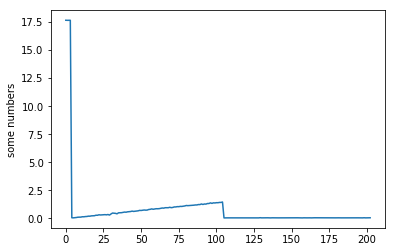

In [32]:
from time import gmtime, strftime

len(propogation_times)
t = [time.total_seconds() for time in propogation_times]
# print(dir(propogation_times[0]))
# print (propogation_times[0].microseconds)
# print propogation_times[0].total_seconds()
# print propogation_times[0].resolution
print(t)
plt.plot(t)
plt.ylabel('some numbers')
plt.show()